<a href="https://colab.research.google.com/github/hasanyusuf01/Codes/blob/main/text_Classification_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pwd

/content


In [ ]:
%cd /content/sample_data/

/content/sample_data


In [ ]:
import pandas as pd
import numpy as nm
import tensorflow 
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten
# import matplot.lib as m

In [ ]:
df=pd.read_csv('/content/sample_data/mnist_test.csv')

In [ ]:
df.info

<bound method DataFrame.info of       7  0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  ...  0.658  0.659  0.660  \
0     2  0    0    0    0    0    0    0    0    0  ...      0      0      0   
1     1  0    0    0    0    0    0    0    0    0  ...      0      0      0   
2     0  0    0    0    0    0    0    0    0    0  ...      0      0      0   
3     4  0    0    0    0    0    0    0    0    0  ...      0      0      0   
4     1  0    0    0    0    0    0    0    0    0  ...      0      0      0   
...  .. ..  ...  ...  ...  ...  ...  ...  ...  ...  ...    ...    ...    ...   
9994  2  0    0    0    0    0    0    0    0    0  ...      0      0      0   
9995  3  0    0    0    0    0    0    0    0    0  ...      0      0      0   
9996  4  0    0    0    0    0    0    0    0    0  ...      0      0      0   
9997  5  0    0    0    0    0    0    0    0    0  ...      0      0      0   
9998  6  0    0    0    0    0    0    0    0    0  ...      0      0      0   

      0

In [ ]:
 (X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()#split

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
X_train.shape#X_train

(60000, 28, 28)

In [ ]:
y_train# labels final answers

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

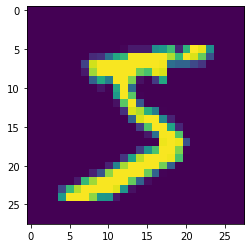

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0])

In [ ]:

####scaling
X_train= X_train/255
X_test= X_test/255


In [ ]:
X_train[0]

In [ ]:
model= Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation ='relu'))# first layer 128 nodes 
model.add(Dense(128,activation ='relu'))
model.add(Dense(10,activation='softmax'))# 2nd layer 10 nodes 

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_7 (Dense)             (None, 128)               100480    
                                                                 
 dense_8 (Dense)             (None, 128)               16512     
                                                                 
 dense_9 (Dense)             (None, 10)                1290      
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history=model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam')## not hotfunction ##categorial columns

In [ ]:
model.fit(X_train,y_train,epochs=25,validation_split=0.2)

Epoch 1/25
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0183 - val_loss: 0.1375
Epoch 2/25
1500/1500 [==============================] - 5s 4ms/step - loss: 0.0163 - val_loss: 0.1243
Epoch 3/25
1500/1500 [==============================] - 5s 4ms/step - loss: 0.0130 - val_loss: 0.1279
Epoch 4/25
1500/1500 [==============================] - 5s 4ms/step - loss: 0.0128 - val_loss: 0.1452
Epoch 5/25
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0137 - val_loss: 0.1306
Epoch 6/25
1500/1500 [==============================] - 5s 4ms/step - loss: 0.0137 - val_loss: 0.1395
Epoch 7/25
1500/1500 [==============================] - 5s 4ms/step - loss: 0.0112 - val_loss: 0.1473
Epoch 8/25
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0079 - val_loss: 0.1473
Epoch 9/25
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0122 - val_loss: 0.1530
Epoch 10/25
1500/1500 [==============================] - 6s 4ms/step - loss: 0.009

In [ ]:
y_prob=model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [ ]:
y_prob

array([[5.22962587e-28, 5.64506824e-21, 2.61789274e-19, ...,
        9.99999940e-01, 6.88388804e-23, 2.36145861e-15],
       [1.41347571e-27, 2.59734914e-21, 9.99999940e-01, ...,
        6.99740062e-20, 8.62896700e-22, 0.00000000e+00],
       [5.49093259e-15, 9.99999821e-01, 4.71876010e-11, ...,
        2.21257609e-10, 1.49165551e-08, 3.96981155e-16],
       ...,
       [2.96688125e-33, 1.92896213e-23, 4.65342831e-32, ...,
        1.66454734e-20, 8.92620777e-22, 1.16055635e-14],
       [1.19035574e-36, 0.00000000e+00, 0.00000000e+00, ...,
        1.34668590e-35, 1.02408116e-23, 0.00000000e+00],
       [6.47594296e-32, 5.44628885e-38, 1.64234388e-37, ...,
        0.00000000e+00, 1.95659870e-22, 1.02668666e-37]], dtype=float32)

In [ ]:
y_pred= y_prob.argmax(axis=1)

In [ ]:
from  sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9776

In [ ]:
## add more hidden layers, no of nodes in layers  , epoch value

In [ ]:
# plt.plot(history.history['loss'])